<h2>Loading the Data</h2>

In [0]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
train=pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

<h2>Reading the Data</h2>

In [7]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [8]:
test.head()

,unique_hash,text,drug
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara


In [9]:
print('Train Shape: ',train.shape)
print('Train Unique Features: ',train.nunique())

Train Shape:  (5279, 4)
Train Unique Features:  unique_hash    5279
text           5181
drug            102
sentiment         3
dtype: int64


In [10]:
print('Test Shape: ',test.shape)
print('Test Unique Features',test.nunique())

Test Shape:  (2924, 3)
Test Unique Features unique_hash    2924
text           2721
drug             95
dtype: int64


In [0]:
# train.drop(['unique_hash'],axis =1,inplace = True)
# train.head()

In [12]:
train.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [13]:
test.isnull().sum()

unique_hash    0
text           0
drug           0
dtype: int64

In [14]:
print('Drugs : ',train['drug'].value_counts())

Drugs :  ocrevus                         676
gilenya                         666
ocrelizumab                     441
entyvio                         303
humira                          270
fingolimod                      238
remicade                        229
opdivo                          224
tarceva                         218
cladribine                      200
keytruda                        199
stelara                         161
tagrisso                        161
alimta                          146
lucentis                         67
eylea                            65
avastin                          52
nivolumab                        50
cimzia                           48
alectinib                        43
crizotinib                       43
vitrectomy                       41
simponi                          39
erlotinib                        35
tecentriq                        34
pemetrexed                       33
xalkori                          33
osimertinib        

In [15]:
print('Drugs : ',train['sentiment'].value_counts())

Drugs :  2    3825
1     837
0     617
Name: sentiment, dtype: int64


<h2>Exploratory Data Analysis </h2>

2    3825
1     837
0     617
Name: sentiment, dtype: int64


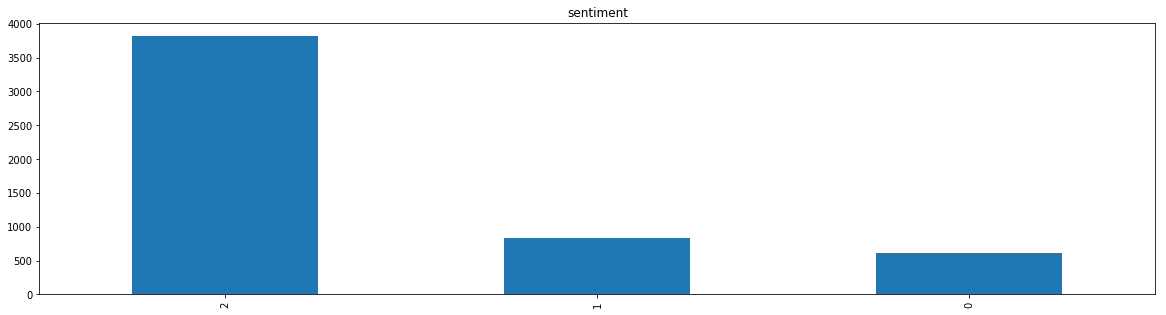

In [16]:
print(train['sentiment'].value_counts())
train['sentiment'].value_counts().plot.bar(figsize=(20,5),title='sentiment')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

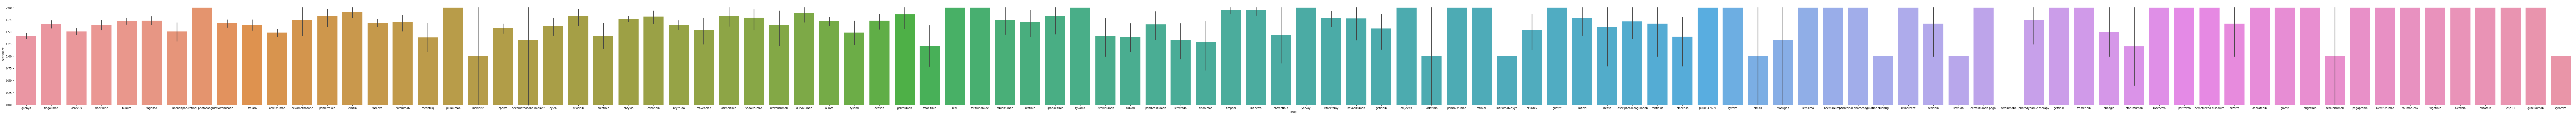

In [17]:
plt.figure(figsize=(20,8))
sns.factorplot('drug', 'sentiment', data=train,kind='bar',aspect=22, size = 6)

In [18]:
print('Number of sentences in training set:',len(train['text'].unique()))
print('Average words per text in train:',train.groupby('text')['text'].count().mean())

Number of sentences in training set: 5181
Average words per text in train: 1.0189152673229107


In [19]:
!pip install wordcloud

In [0]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
def display_wordCloud(train, title = None):
    wordcloud = WordCloud(background_color = 'black',
                         stopwords = stopwords,
                         max_words = 200,
                         max_font_size = 40,
                         scale = 3,
                         random_state = 1).generate(str(train))
    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

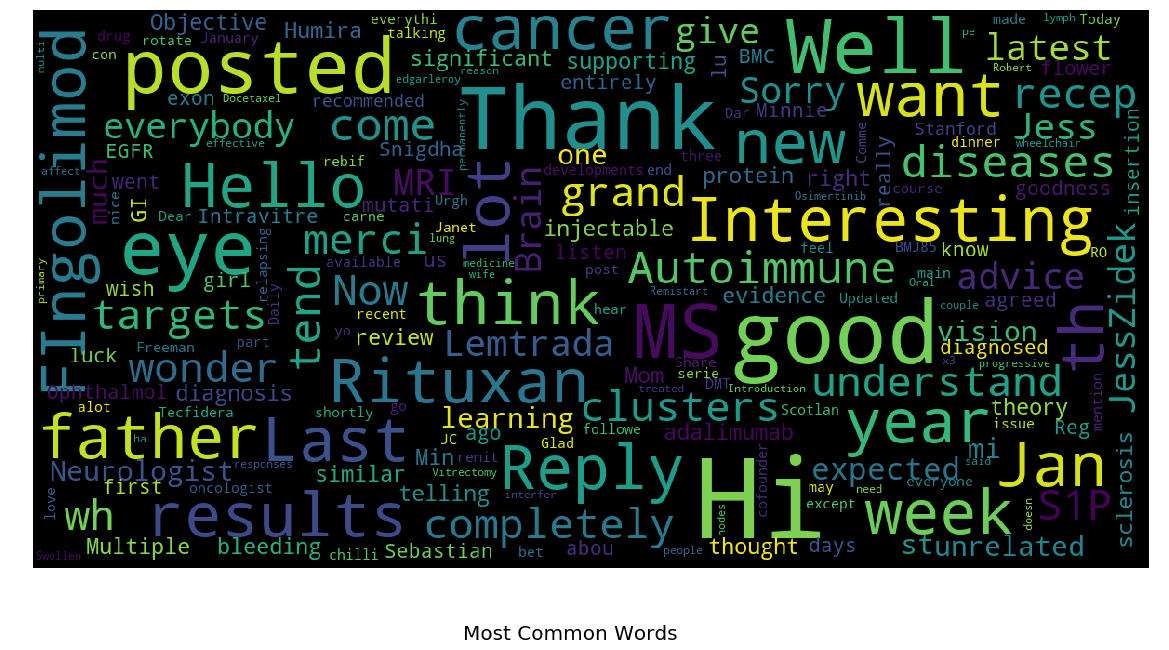

In [22]:
display_wordCloud(train['text'],'Most Common Words ')

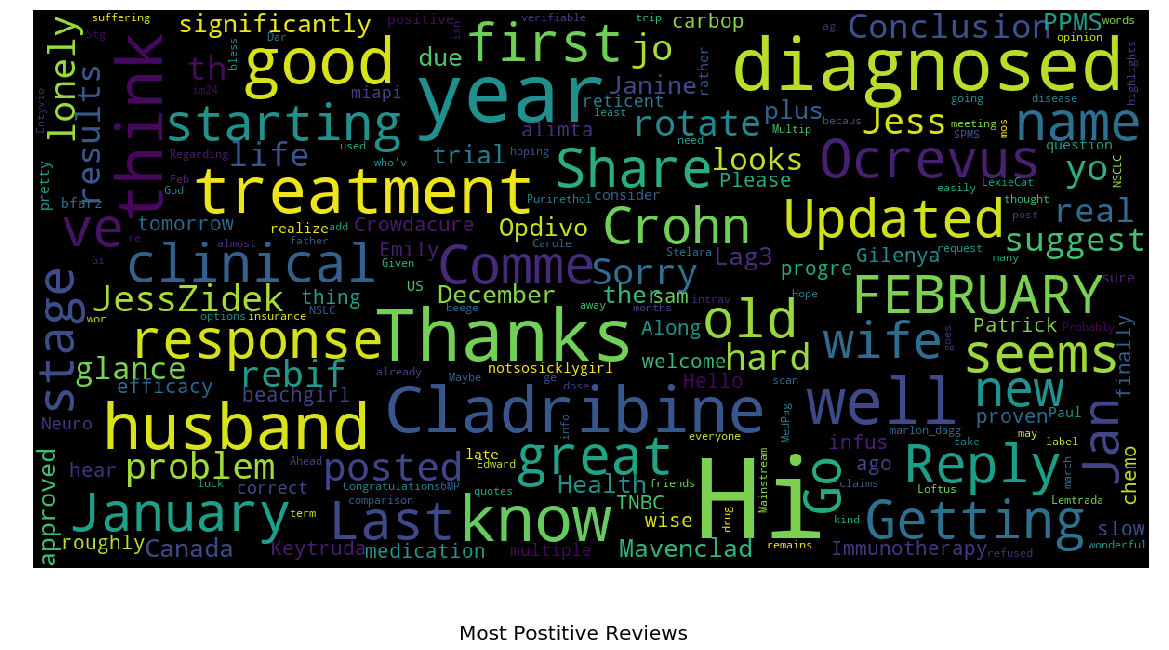

In [23]:
display_wordCloud(train[train['sentiment']==0]['text'],'Most Postitive Reviews')

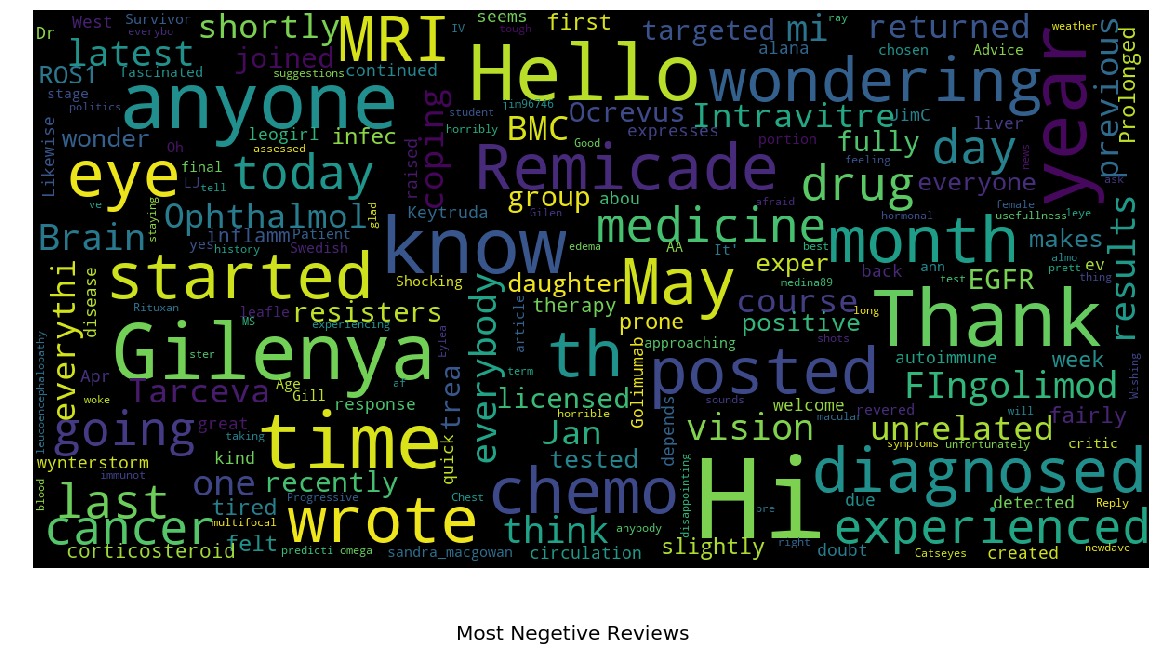

In [24]:
display_wordCloud(train[train['sentiment']==1]['text'],'Most Negetive Reviews')

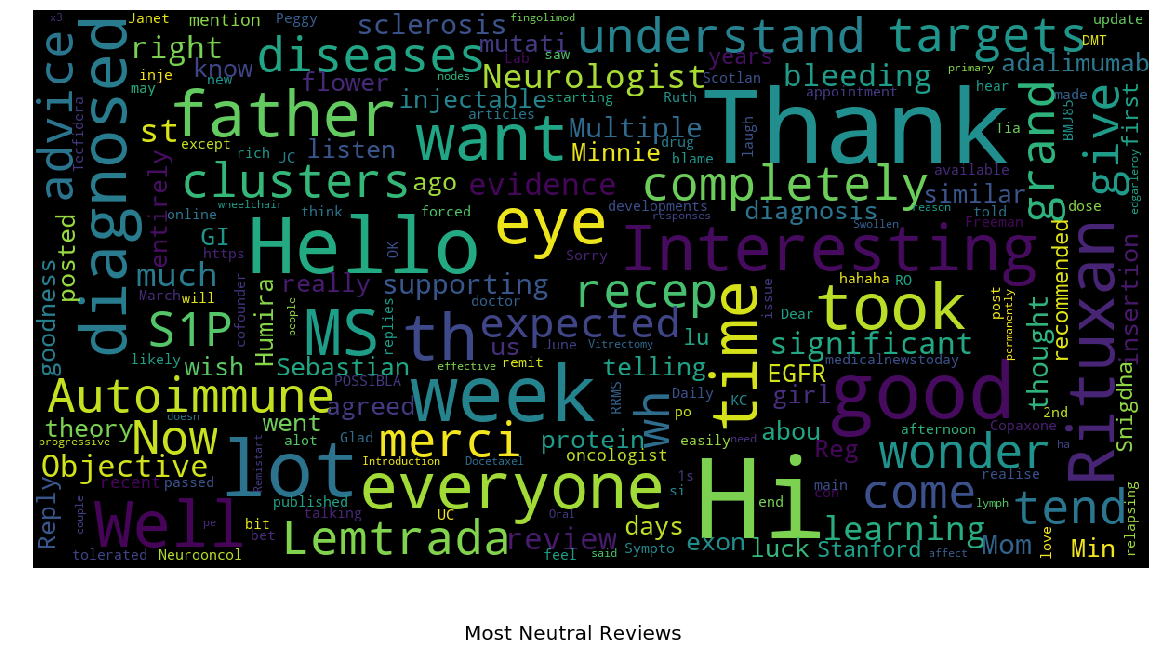

In [25]:
display_wordCloud(train[train['sentiment']==2]['text'],'Most Neutral Reviews')

In [26]:
print(train['text'][1])

I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastin

In [27]:
text_final = list(train['text'] + " " + train['drug'])
text_final = pd.DataFrame(text_final,columns=['text'])
text_final.head()

,text
0,Autoimmune diseases tend to come in clusters. ...
1,I can completely understand why you’d want to ...
2,Interesting that it only targets S1P-1/5 recep...
3,"Very interesting, grand merci. Now I wonder wh..."
4,"Hi everybody, My latest MRI results for Brain ..."


In [28]:
print(text_final['text'][1])

I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemastin

In [29]:
test_text_final = list(test['text'] + " " + test['drug'])
test_text_final = pd.DataFrame(test_text_final,columns=['text'])
test_text_final.head()
print(test['text'][1])
print("After Adding Drug: ",test_text_final['text'][1])

On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!!
After Adding Drug:  On fingolimod and have been since December 2015; the only way I can describe it any better is like feeling drunk but without having had a drink!!! fingolimod


In [30]:
# printing some random reviews
sent_0 = text_final['text'].values[0]
print(sent_0)
print("="*150)

sent_1000 = text_final['text'].values[1000]
print(sent_1000)
print("="*150)

sent_1500 = text_final['text'].values[1500]
print(sent_1500)
print("="*150)

sent_4900 = text_final['text'].values[4900]
print(sent_4900)
print("="*150)

Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying. gilenya
If Cladribine had indeed been approved it would be the most effective and most profitable drug... Data DMF and Fingolimod surprised me also about the progression of disability as well as the teriflunomide. I think this means that as soon as they start treatment with higher chances of not converting to SPMS ... Hence also perhaps why the answers Fingolimod did not work in the PPMS ... fingolimod
I'm going to try to answer all of your questions, but everyone story is complicated (and english is not my first language!) :P What were you taking prior to Stelara? I was put on Remicade l

In [31]:
import re
# remove urls from text python: https://stackoverflow.com/a/40823105/4084039
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying. gilenya


In [32]:
# https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying. gilenya
If Cladribine had indeed been approved it would be the most effective and most profitable drug... Data DMF and Fingolimod surprised me also about the progression of disability as well as the teriflunomide. I think this means that as soon as they start treatment with higher chances of not converting to SPMS ... Hence also perhaps why the answers Fingolimod did not work in the PPMS ... fingolimod
I'm going to try to answer all of your questions, but everyone story is complicated (and english is not my first language!) :P What were you taking prior to Stelara? I was put on Remicade l

In [33]:
#remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
sent_4900 = re.sub("\S*\d\S*", "", sent_4900).strip()
print(sent_4900)

stage  lung cancer with bone mets. diagnosed in June of this year. Survivor of head and neck cancer from  years ago. Have had aspirating pneumonia for  months, from dysphagia where my neck muscles were weak from prior radiation in  Had a feeding tube placed  weeks ago. Finally able to start back Keytruda after not being able to do chemo or keytruda for  weeks, due to pneumonia. The PET scan reveals the treatment was working but can't seem to kick the pneumonia completely. Any feedback would be appreciated. keytruda


In [34]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

I m going to try to answer all of your questions but everyone story is complicated and english is not my first language P What were you taking prior to Stelara I was put on Remicade last september 6 wks 5mg kg I did flare in october was put on 30 mg of Pred I did flare again at Christmas it was c diff got hospitalized put on pred 40mg 2 months Vanco started Remicade protocol from zero I simply had no more Remicade in my blood and put on 10mg kg every 4weeks After I got a big flare mid march Were you actively flaring when you started Stelara how bad mild moderate severe Yes it was severe This flare was the worst Every stool test came back negative My GI was out of town so until he returned his collegues took care of me I got an emergency coloscopy and got re diagnosed Crohn They only could go 20cm in even if I was on Fentanyl I was in pain the whole time I was dehydrated and my pulse was monitored at 140 This GI put me on 30 mg pred Went back to hospital next day for IV hydratation solu

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [36]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
stopwords= set(['br', 'the', 'i', 'me', 'my', 'm' ,'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'hi', 'hello','he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

<h2>Stemming</h2>

In [0]:
from nltk.stem import  SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer
def stem_text(text):
    tokenizer = ToktokTokenizer()
    stemmer = SnowballStemmer('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

<h2>Lemmatization</h2>

In [45]:
!pip install nltk

In [46]:
nltk.download('punkt')
nltk.download('wordnet')

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in      

In [0]:
# Improved version of Stemming
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

<h2>Cleaning the Data</h2>

In [137]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(text_final['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = replace_contractions(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    sentance = stem_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 5279/5279 [00:40<00:00, 130.48it/s]


In [138]:
# Cleaning Texts of Test Dataset

# Combining all the above stundents 
from tqdm import tqdm
preprocessed_reviews_test = []
# tqdm is for printing the status bar
for sentance in tqdm(test_text_final['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = replace_contractions(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    sentance = stem_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews_test.append(sentance.strip())

100%|██████████| 2924/2924 [00:26<00:00, 109.23it/s]


In [139]:
for sentence in preprocessed_reviews[:10]:
    print(sentence)

autoimmun diseas tend come cluster gilenya feel good think chang anyth wast time energi take tysabri feel amaz no symptom dodgi color vision sinc alway know know last month year decad ive decid enjoy ride no point worri gilenya
complet understand whi want tri result report lectur alway stand scrutini peer review dure public much still befor convinc hope doe work realli awar happi risk great think import present balanc way understand whi move straight first show promis anim studi use drug human still lot anim data gather human data gather befor anyon tell safe effect tell mani time anim studi follow human one major attrit point drug develop unpredict issu cladribin gilenya wa interact predict onc peopl tri doctor see pattern work go clemastin metformin veri excit given said current condit person risk toler make sens tri definit everyon gilenya
interest onli target receptor rather like fingolimod hope soon see ae sae yes not sure mean exact quot nine patient report serious advers event m

In [140]:
train_X = pd.DataFrame(preprocessed_reviews,columns=['text'])
test_X = pd.DataFrame(preprocessed_reviews_test,columns=['text'])
print('Train Shape: ',train_X.shape)
print('Test Shape: ',test_X.shape)

Train Shape:  (5279, 1)
Test Shape:  (2924, 1)


In [141]:
print(train_X['text'][0])
print(train_X.head())

autoimmun diseas tend come cluster gilenya feel good think chang anyth wast time energi take tysabri feel amaz no symptom dodgi color vision sinc alway know know last month year decad ive decid enjoy ride no point worri gilenya
                                                text
0  autoimmun diseas tend come cluster gilenya fee...
1  complet understand whi want tri result report ...
2  interest onli target receptor rather like fing...
3  veri interest grand merci wonder lemtrada ocre...
4  everybodi latest mri result brain cervic cord ...


In [53]:
type(preprocessed_reviews)
type(preprocessed_reviews_test)

list

In [145]:
# Tokenizing the Cleaned Texts
full_clean_text = train_X.append(test_X,ignore_index = True)
full_clean_text_tokens = full_clean_text['text'].apply(lambda x: x.split())
print(full_clean_text_tokens.shape)

(8203,)


In [152]:
len(full_clean_text_tokens)

8203

<h2>Featurization</h2>

<h3>Bag of Words</h3>

In [54]:
#Bow
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(preprocessed_reviews)
print("some feature names: ",count_vect.get_feature_names()[:10])
print("="*150)

final_counts = count_vect.transform(preprocessed_reviews)
print("Type :  " , type(final_counts))
print("Shape of final_counts : " , final_counts.shape)
print("Number of Unique words : " , final_counts.get_shape()[1])

some feature names:  ['aa', 'aaaai', 'aaarrrrrrgggghhhhhhh', 'aacr', 'aad', 'aah', 'aami', 'aan', 'aand', 'aao']
Type :   <class 'scipy.sparse.csr.csr_matrix'>
Shape of final_counts :  (5279, 33965)
Number of Unique words :  33965


<h3>Bi-grams and N-grams</h3>

In [55]:
#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("Type: ",type(final_bigram_counts))
print("Shape: ",final_bigram_counts.get_shape())
print("the number of unique words of Bi-grams and N-grams ", final_bigram_counts.get_shape()[1])

Type:  <class 'scipy.sparse.csr.csr_matrix'>
Shape:  (5279, 14927)
the number of unique words of Bi-grams and N-grams  14927


<h3>TFID Vectorizer</h3>

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,1), max_features = 14000,strip_accents = 'unicode', analyzer = 'word', stop_words = stopwords)
total_tfidf_vect = tf_idf_vect.fit_transform(preprocessed_reviews + preprocessed_reviews_test)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*150)

train_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
test_tf_idf = tf_idf_vect.transform(preprocessed_reviews_test)

print("Type of count vectorizer for TRAIN",type(train_tf_idf))
print("Shape of out text TFIDF vectorizer for TRAIN",train_tf_idf.get_shape())
print("Number of unique words including both unigrams and bigrams for TRAIN", train_tf_idf.get_shape()[1])

print("Type of count vectorizer for TEST ",type(test_tf_idf))
print("Shape of out text TFIDF vectorizer for TEST ",test_tf_idf.get_shape())
print("Number of unique words including both unigrams and bigrams for TEST", test_tf_idf.get_shape()[1])


some sample features(unique words in the corpus) ['aa', 'aacr', 'aan', 'aap', 'aaron', 'ab', 'abandon', 'abandoned', 'abatacept', 'abbott']
Type of count vectorizer for TRAIN <class 'scipy.sparse.csr.csr_matrix'>
Shape of out text TFIDF vectorizer for TRAIN (5279, 14000)
Number of unique words including both unigrams and bigrams for TRAIN 14000
Type of count vectorizer for TEST  <class 'scipy.sparse.csr.csr_matrix'>
Shape of out text TFIDF vectorizer for TEST  (2924, 14000)
Number of unique words including both unigrams and bigrams for TEST 14000


<h2> Word Embedding with Word2vec

In [201]:
import gensim

model_w2v = gensim.models.Word2Vec(
            full_clean_text_tokens,
            size=400, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(full_clean_text_tokens, total_examples= len(full_clean_text_tokens), epochs=20)

W0728 11:36:06.360942 139886955308928 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(32400295, 34633680)

In [203]:
words = list(model_w2v.wv.vocab)
print('vocab size: ',len(words))

vocab size:  20194


In [157]:
model_w2v.wv.most_similar(positive="thank")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('fluffyolli', 0.5717468857765198),
 ('appreci', 0.5665954351425171),
 ('sunita', 0.5456295013427734),
 ('dca', 0.5345145463943481),
 ('nock', 0.5327010750770569),
 ('ilan', 0.527289867401123),
 ('semon', 0.5266703963279724),
 ('songladi', 0.5262894630432129),
 ('saralb', 0.5184608697891235),
 ('annabel', 0.5167862772941589)]

<h3>Creating word vector</h3>

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [206]:
# Preparing Word2Vec Feature set
wordvec_arrays = np.zeros((len(full_clean_text_tokens), 400))

for i in range(len(full_clean_text_tokens)):
    wordvec_arrays[i,:] = word_vector(full_clean_text_tokens[i], 400)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(8203, 400)

In [188]:
wordvec_arrays.shape

(8203, 200)

In [207]:
#Setting the Target Variable 

y = train['sentiment']
print("Sentiment Shape: ",y.shape)
y.head()

Sentiment Shape:  (5279,)


0    2
1    2
2    2
3    2
4    1
Name: sentiment, dtype: int64

In [208]:
train_w2v = wordvec_df.iloc[:train_X.shape[0],:]
test_w2v = wordvec_df.iloc[train_X.shape[0]:,:]
print("Train w2v Shape: ",train_w2v.shape,"Test w2v Shape: ", test_w2v.shape)

Train w2v Shape:  (5279, 400) Test w2v Shape:  (2924, 400)


In [0]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_w2v,y,test_size = 0.2, random_state=42)

In [210]:
print("Train Shape: ",x_train.shape,"validation Shape: ", x_val.shape)
print("Target train shape y_train : ",y_train.shape,"Target Validation Shape y_val : ", y_val.shape)

Train Shape:  (4223, 400) validation Shape:  (1056, 400)
Target train shape y_train :  (4223,) Target Validation Shape y_val :  (1056,)


<h2>Model Building</h2>

In [211]:
%%time
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='multi:softmax',max_depth=6, n_estimators=1000, nthread=3).fit(x_train, y_train,verbose = True)

CPU times: user 8min 59s, sys: 74.7 ms, total: 8min 59s
Wall time: 2min 59s


In [212]:
from sklearn.metrics import f1_score
prediction = xgb_model.predict(x_val)
print(f1_score(y_val, prediction,average='macro'))

0.38918804414532104


In [0]:
preds = xgb_model.predict(test_w2v) 

In [182]:
submission =  pd.DataFrame(columns = ['unique_hash','sentiment'])
submission['unique_hash'] = test['unique_hash']
submission['sentiment'] = preds
submission.sentiment.value_counts()

2    2791
1     100
0      33
Name: sentiment, dtype: int64

In [183]:
submission.to_csv('submission_XGB.csv',index = False)
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2


In [0]:
from google.colab import files
files.download('submission_XGB.csv')

<h2> Using word2vec to create embedding matrix used for DL Algos</h2>

In [213]:
embed_size = 100
import gensim

w2v_model = gensim.models.Word2Vec(
            full_clean_text_tokens,
            size=100, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=1,
            hs = 0,
            workers= 4, # no.of cores
            seed = 34)

w2v_model.train(full_clean_text_tokens, total_examples= len(full_clean_text_tokens), epochs=20)

W0728 11:59:21.223221 139886955308928 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles


(32618174, 34633680)

In [220]:
words = list(w2v_model.wv.vocab)
print("vocab Size:", len(words))

vocab Size: 30430


In [216]:
# saving the word2vec model

filename = 'innoplexus_embedding_word2vec.txt'
w2v_model.wv.save_word2vec_format(filename,binary = False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [218]:
os.path


<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>

In [0]:
def load_index():
    filename = 'innoplexus_embedding_word2vec.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:embed_size]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(filename))
    return embeddings_index

embedding_index = load_index()

<h2>For Deep Learning Models</h2>

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import Dense,GRU,LSTM,Embedding,Input,Reshape,Conv2D
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten,MaxPool2D,Bidirectional, CuDNNLSTM
from keras.layers import GlobalAveragePooling1D,concatenate
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,f1_score

In [0]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

In [0]:
class F1Evaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            y_pred = np.argmax(y_pred)
            score = f1_score(self.y_val, y_pred)
            print("\n F1 Score - epoch: %d - score: %.6f \n" % (epoch+1, score))

<h2>Tokenizing the Data</h2>

In [0]:
embed_size = 100
batch_size = 128
epochs = 5
num_classes=3

In [0]:
# # Defining max_length which will be input dims

# full_text = preprocessed_reviews + preprocessed_reviews_test
# max_length = max([len(sentance.split()) for sentance in full_text])
# print('max_length',max_length)

max_length = 100

In [0]:
# Creating Tokens of the pre-processed data
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(list(preprocessed_reviews) + list(preprocessed_reviews_test))
train_final = tokenizer.texts_to_sequences(preprocessed_reviews)
test_final = tokenizer.texts_to_sequences(preprocessed_reviews_test)

# Adding Padding to the tokens
train_final =pad_sequences(train_final, maxlen = max_length)
test_final = pad_sequences(test_final, maxlen = max_length)

In [260]:
train_final.shape

(5279, 100)

In [261]:
word_index = tokenizer.word_index

print("Unique Tokens found: ",len(word_index))

Unique Tokens found:  30430


In [262]:
# One Hot Encoding the Target Variable 

from keras.utils import to_categorical
target = train.sentiment.values
y = to_categorical(target)
print("Sentiment Shape: ",y.shape)
print(y)

Sentiment Shape:  (5279, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


<h2>Creating Embedding Matrix</h2>

In [263]:
num_words = len(word_index)+1
embedding_matrix = np.zeros(shape=(num_words,embed_size))

for word,i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        #words not found in embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

print(num_words)

30431


In [264]:
print(embedding_matrix.shape)

(30431, 100)


<h2>Models</h2>

In [0]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_final,y,test_size = 0.2, random_state=42)

In [280]:
print("Train Shape: ",x_train.shape,"Tsst Shape: ", test_final.shape)

Train Shape:  (4223, 100) Tsst Shape:  (2924, 100)


In [266]:
print("Train Shape: ",x_train.shape,"validation Shape: ", x_val.shape)
print("Target train shape y_train : ",y_train.shape,"Target Validation Shape y_val : ", y_val.shape)

Train Shape:  (4223, 100) validation Shape:  (1056, 100)
Target train shape y_train :  (4223, 3) Target Validation Shape y_val :  (1056, 3)


In [273]:
model_CnnGRU= Sequential()
model_CnnGRU.add(Embedding(num_words,embed_size,input_length=max_length,embeddings_initializer=Constant(embedding_matrix)))
model_CnnGRU.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
model_CnnGRU.add(MaxPooling1D(pool_size=2))
model_CnnGRU.add(Dropout(0.25))
model_CnnGRU.add(GRU(128,return_sequences=True))
model_CnnGRU.add(Dropout(0.3))
model_CnnGRU.add(Flatten())
model_CnnGRU.add(Dense(128,activation='relu'))
model_CnnGRU.add(Dropout(0.5))
model_CnnGRU.add(Dense(3,activation='sigmoid'))
model_CnnGRU.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model_CnnGRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          3043100   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 64)           19264     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 50, 128)           74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
__________

In [279]:
%%time
history=model_CnnGRU.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 4223 samples, validate on 1056 samples
Epoch 1/5
4223/4223 [==============================] - 2s 576us/step - loss: 0.0511 - acc: 0.9823 - val_loss: 0.9699 - val_acc: 0.7999
Epoch 2/5
4223/4223 [==============================] - 2s 499us/step - loss: 0.0452 - acc: 0.9841 - val_loss: 1.0844 - val_acc: 0.8112
Epoch 3/5
4223/4223 [==============================] - 2s 504us/step - loss: 0.0412 - acc: 0.9849 - val_loss: 1.0750 - val_acc: 0.7967
Epoch 4/5
4223/4223 [==============================] - 2s 504us/step - loss: 0.0413 - acc: 0.9848 - val_loss: 1.0179 - val_acc: 0.7860
Epoch 5/5
4223/4223 [==============================] - 2s 504us/step - loss: 0.0339 - acc: 0.9869 - val_loss: 1.0523 - val_acc: 0.7977
CPU times: user 19.2 s, sys: 2.73 s, total: 21.9 s
Wall time: 10.9 s


In [281]:
y_val = [np.argmax(line) for line in y_val]
y_val = np.array(y_val)
prediction = model_CnnGRU.predict_classes(x_val,verbose=1)
print(f1_score(y_val, prediction,average='macro'))

1056/1056 [==============================] - 1s 1ms/step
0.46149519770006214


In [282]:
y_predCnnGRU = model_CnnGRU.predict_classes(test_final,verbose=1)

2924/2924 [==============================] - 3s 906us/step


In [283]:
submission =  pd.DataFrame(columns = ['unique_hash','sentiment'])
submission['unique_hash'] = test['unique_hash']
submission['sentiment'] = y_predCnnGRU
submission.sentiment.value_counts()

2    2484
1     288
0     152
Name: sentiment, dtype: int64

In [287]:
submission.to_csv('submission_CnnGRU.csv',index = False)
submission.head()

,unique_hash,sentiment
0,9e9a8166b84114aca147bf409f6f956635034c08,2
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,2
2,50b6d851bcff4f35afe354937949e9948975adf7,2
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,2
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,2
